## Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
df = pd.read_csv("/Users/tony/Desktop/Career Foundry/Achievement 6/Superstore_cleaned.csv", encoding='latin1')

In [3]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Data cleaning

In [4]:
# Remove the categorical columns
df_cleaned = df.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
                              'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
                              'Product ID', 'Category', 'Sub-Category', 'Product Name'])

# Check for any missing values and drop them if found
df_cleaned = df_cleaned.dropna()

# Display the cleaned dataframe to ensure only numerical columns remain
df_cleaned.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back into a DataFrame for easier manipulation later
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)

# Display the first few rows of the standardized data
df_scaled.head()

,Sales,Quantity,Discount,Profit
0,0.051510,-0.804303,-0.756643,0.056593
1,0.805633,-0.354865,-0.756643,0.815054
2,-0.345368,-0.804303,-0.756643,-0.093002
3,1.167688,0.544012,1.423149,-1.757484
4,-0.332935,-0.804303,0.212153,-0.111593


## Elbow technique

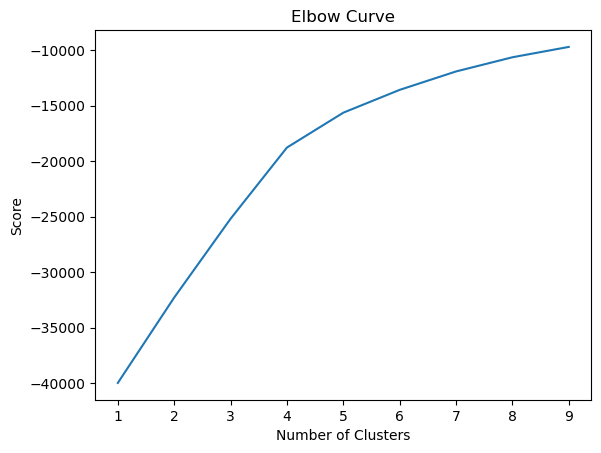

In [6]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Initialize k-means clustering for each cluster count in the range with n_init set to 10
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]

# Fit the model and calculate the score (inertia) for each number of clusters
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

# Plot the elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Given this analysis, 3 clusters would be a suitable choice for running the k-means algorithm on your data.

#### Clear Elbow Point:
The elbow point at 3 clusters suggests that this is the point where the model achieves a good balance between minimizing inertia and maintaining simplicity. Adding more clusters beyond this point results in only marginal improvements in inertia reduction.

#### Interpretability:
With 3 clusters, the model is likely to create meaningful and interpretable groupings of your data, without overcomplicating the analysis.

#### Simplicity:
Using 3 clusters keeps the model simple, making it easier to understand and explain the results.

## K-means clustering

In [7]:
# Initialize the KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the k-means algorithm to the standardized data
kmeans.fit(df_scaled)

# Assuming kmeans was already fitted to df_scaled
df['clusters'] = kmeans.labels_

# Display the first few rows of the cleaned and clustered dataset
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,clusters
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1


## Visualizations

In [10]:
# Define a color palette
palette = {0: 'red', 1: 'blue', 2: 'green'}

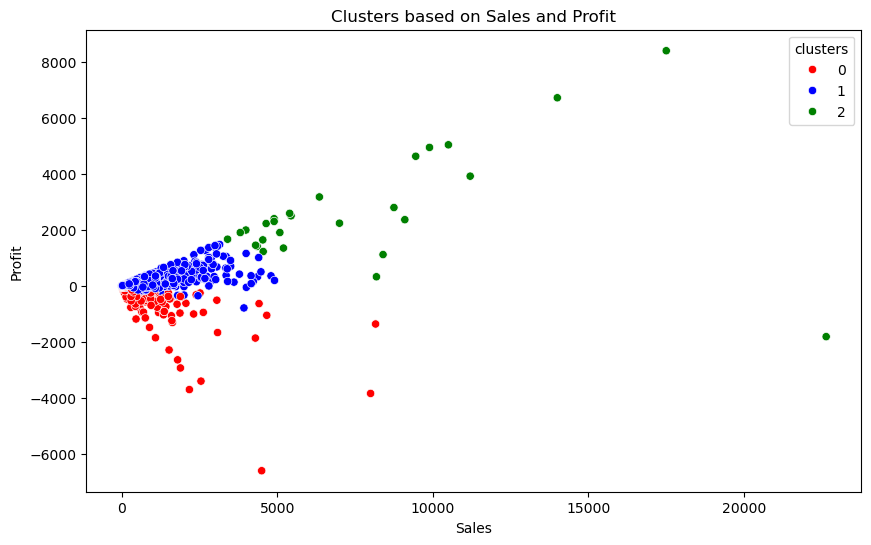

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='clusters', data=df, palette=palette)
plt.title('Clusters based on Sales and Profit')
plt.show()

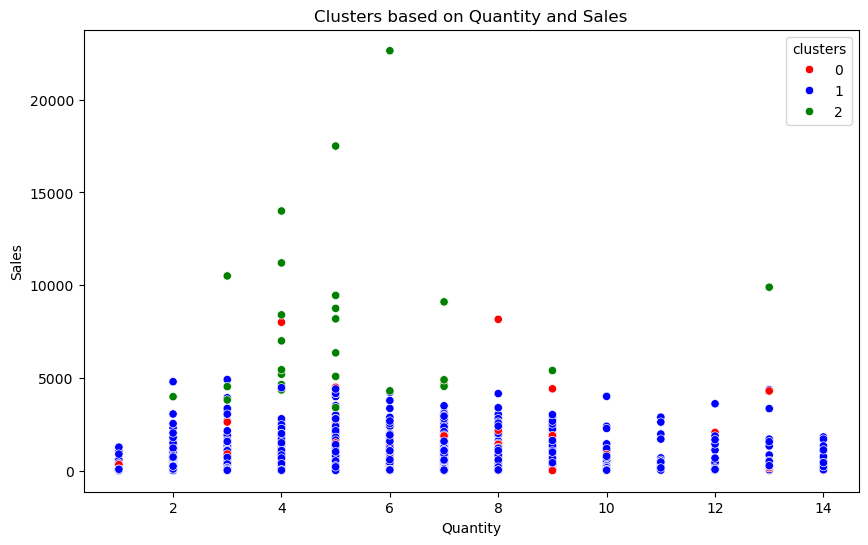

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', hue='clusters', data=df, palette=palette)
plt.title('Clusters based on Quantity and Sales')
plt.show()

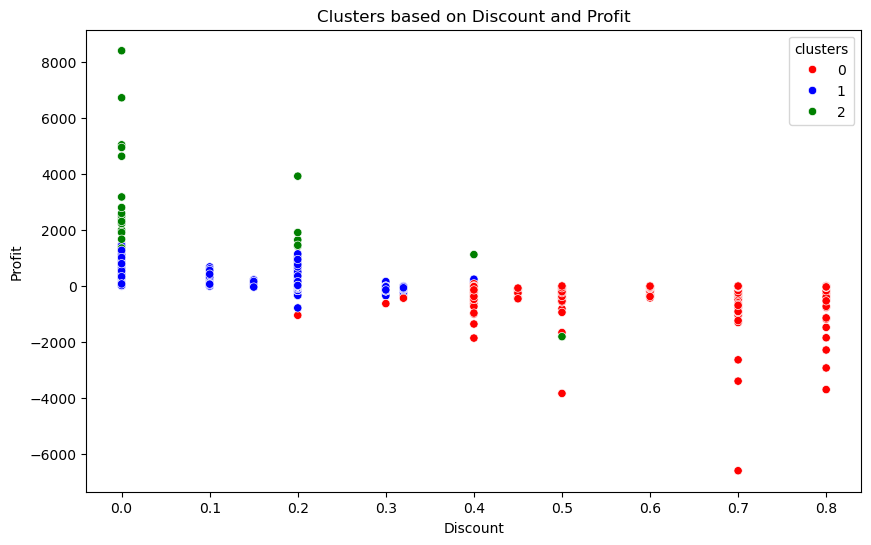

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', hue='clusters', data=df, palette=palette)
plt.title('Clusters based on Discount and Profit')
plt.show()

### Sales vs. Profit

Cluster 0 (Red) seems to represent the majority of the data points that have relatively low sales and low profits, with some overlap with negative profits.

Cluster 1 (Blue) represents data points that also have low sales but mostly negative profits.

Cluster 2 (Green) represents data points with higher sales and higher profits, showing that this cluster identifies successful sales transactions.

#### Insights:
The clustering here makes sense because higher sales generally lead to higher profits, which is captured by Cluster 2. Cluster 0 captures smaller transactions with moderate success, while Cluster 1 includes transactions where sales are lower, and the business possibly incurred losses (negative profits).

### Quantity vs. Sales

Cluster 0 (Red) represents low to moderate quantities with corresponding low sales.

Cluster 1 (Blue) shows lower quantities that correspond to low sales.

Cluster 2 (Green) seems to cover a broader range of sales, particularly for higher quantities.

#### Insights:
The clusters make sense because, in general, we expect higher quantities to be associated with higher sales. However, the overlapping clusters indicate that quantity alone doesn't perfectly predict sales—likely because of price variations among products, discounts, or other factors.

### Discount vs. Profit

Cluster 0 (Red) shows data points with varying discounts, mostly centered around 0, with corresponding profits. This cluster likely represents transactions with minimal to no discounts and moderate profits.

Cluster 1 (Blue) represents a range of discounts, mostly around 20%-40%, associated with lower or negative profits. This cluster seems to capture the cases where higher discounts negatively impact profitability.

Cluster 2 (Green) includes a few outliers where despite higher discounts, the profits remain high. This cluster identifies some exceptions where the discounts didn't negatively impact the profits as much.

#### Insights:
The clustering indicates that higher discounts generally lead to lower profits, which is evident from the majority of points in Cluster 1 (Blue). However, Cluster 2 (Green) shows that there are some instances where high profits are achieved even with significant discounts, perhaps due to high-margin products or bulk sales. Cluster 0 (Red) identifies the standard cases with lower discounts and moderate profits. This behavior is consistent with typical business scenarios, making the clusters quite reasonable for analysis.

### Overall Conclusion:
The clusters do make sense based on the general principles of sales, profit, and the impact of quantity and discounts. However, the overlaps and the presence of outliers suggest that other factors may be influencing these relationships, which could be worth exploring further. For instance, product categories, customer segments, or regional factors might be impacting these clusters and could be incorporated in further analysis to refine the clustering.

## Summary statistics

In [15]:
cluster_stats = df.groupby('clusters').agg({
    'Sales': ['mean', 'median'],
    'Quantity': ['mean', 'median'],
    'Discount': ['mean', 'median'],
    'Profit': ['mean', 'median']
})

cluster_stats


Sales            Quantity         Discount         \
                 mean    median      mean median      mean median   
clusters                                                            
0          194.243193    22.608  3.891725    3.0  0.646118    0.7   
1          211.645426    59.200  3.772166    3.0  0.093444    0.0   
2         7685.179259  5443.960  5.185185    5.0  0.070370    0.0   

               Profit             
                 mean     median  
clusters                          
0         -110.217834   -16.7304  
1           38.628529    10.8682  
2         2610.220085  2239.9872

The results from the cluster analysis and the descriptive statistics can provide valuable insights for various future steps in an analytics pipeline. Here are some potential uses:

### 1. **Customer Segmentation:**
   - The clusters could be used to segment customers based on their purchasing behavior. For example, customers in the "green" cluster, which shows higher sales and profits, could be targeted with premium products or exclusive offers. Conversely, customers in the "blue" cluster, which shows lower sales and higher discounts, could be approached with more aggressive promotions or discount offers to boost their engagement and spending.

### 2. **Product Pricing Strategies:**
   - The relationship between discounts and profits in the clusters can inform pricing strategies. The "blue" cluster indicates that heavy discounting is associated with negative profits. This insight could be used to refine discount strategies, possibly reducing discounts or offering bundled products that maintain profitability.

### 3. **Sales and Marketing Campaigns:**
   - The clusters can guide targeted marketing campaigns. For instance, the "green" cluster could represent high-value transactions, and marketing campaigns could focus on upselling or cross-selling to this segment. The "red" cluster, with moderate sales and profits, might be targeted with campaigns aimed at increasing loyalty and encouraging more frequent purchases.

### 4. **Inventory Management:**
   - Understanding the clusters can help optimize inventory. Products associated with the "green" cluster, which shows higher sales and profits, might be prioritized for stock replenishment. Conversely, products in the "blue" cluster might require re-evaluation of their pricing or discount strategies to avoid excess inventory.


### 5. **Profitability Analysis:**
   - The results can be used to conduct a deeper profitability analysis. By understanding the dynamics between sales, discounts, and profit in each cluster, businesses can focus on maximizing profitability by targeting specific customer segments or adjusting their sales strategies accordingly.


### 6. **Personalized Customer Experience:**
   - Using cluster analysis, businesses can personalize the customer experience based on the behaviors and characteristics of different segments. For instance, customers in the "green" cluster might receive more personalized, high-end service, while those in the "blue" cluster might receive more price-sensitive offers.
